In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
import keras
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv("breast_cancer_data.csv")
display(data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [5]:
X = data.iloc[:,:-1]
print(data.iloc[:,:-1])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [6]:
Y = data['target']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Transfer data target to one-hot vector models
y_train_one = to_categorical(y_train, 2)
y_test_one = to_categorical(y_test, 2)

print(y_train_one)
# Norminalization
sc = MinMaxScaler(feature_range=(0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 

#### Using Keras framework to build the network model

In [8]:
model = keras.Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

#### Compile

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics = ['accuracy'])

In [10]:
history = model.fit(x_train, y_train_one, epochs=100, batch_size = 16, verbose = 2, validation_data=(x_test, y_test_one))
model.save('model.h5')

Epoch 1/100
29/29 - 0s - 12ms/step - accuracy: 0.6703 - loss: 0.6596 - val_accuracy: 0.8509 - val_loss: 0.6349
Epoch 2/100
29/29 - 0s - 1ms/step - accuracy: 0.8286 - loss: 0.6401 - val_accuracy: 0.8772 - val_loss: 0.6166
Epoch 3/100
29/29 - 0s - 1ms/step - accuracy: 0.8374 - loss: 0.6236 - val_accuracy: 0.8772 - val_loss: 0.5995
Epoch 4/100
29/29 - 0s - 1ms/step - accuracy: 0.8615 - loss: 0.6084 - val_accuracy: 0.9035 - val_loss: 0.5821
Epoch 5/100
29/29 - 0s - 1ms/step - accuracy: 0.8681 - loss: 0.5930 - val_accuracy: 0.9035 - val_loss: 0.5645
Epoch 6/100
29/29 - 0s - 1ms/step - accuracy: 0.8637 - loss: 0.5776 - val_accuracy: 0.9123 - val_loss: 0.5465
Epoch 7/100
29/29 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.5620 - val_accuracy: 0.9123 - val_loss: 0.5284
Epoch 8/100
29/29 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.5460 - val_accuracy: 0.9298 - val_loss: 0.5099
Epoch 9/100
29/29 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.5294 - val_accuracy: 0.9211 - val_loss: 0.4907
Epoch 10/

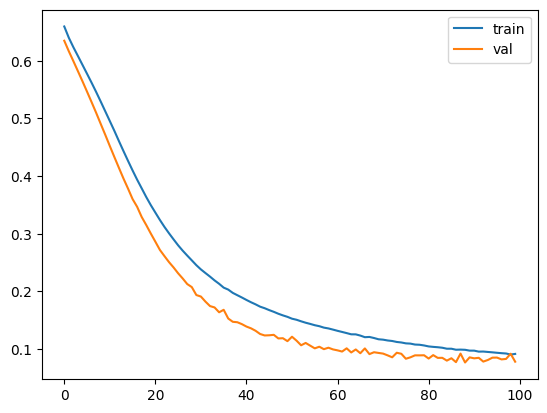

In [11]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()
plt.show()

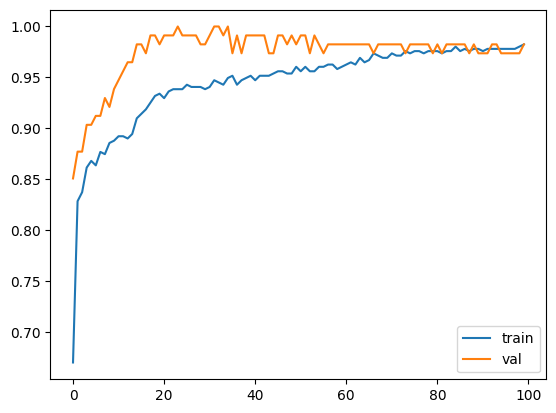

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.legend()
plt.show()

In [13]:
pre_y = model.predict(x_test)
display(pre_y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[8.60034823e-01, 1.39965206e-01],
       [1.75685982e-05, 9.99982536e-01],
       [4.34946734e-03, 9.95650589e-01],
       [9.93217707e-01, 6.78239949e-03],
       [9.93874669e-01, 6.12540822e-03],
       [5.48831158e-09, 1.00000000e+00],
       [4.38529071e-08, 1.00000000e+00],
       [2.27296073e-02, 9.77270424e-01],
       [7.26672053e-01, 2.73327947e-01],
       [9.75033820e-01, 2.49662269e-02],
       [7.64470756e-01, 2.35529214e-01],
       [6.97334204e-03, 9.93026733e-01],
       [8.93332660e-01, 1.06667332e-01],
       [2.08676040e-01, 7.91323900e-01],
       [9.83442783e-01, 1.65572688e-02],
       [8.88226263e-04, 9.99111712e-01],
       [9.67951596e-01, 3.20484675e-02],
       [9.94543552e-01, 5.45640383e-03],
       [9.95359540e-01, 4.64057364e-03],
       [3.04883929e-06, 9.99996901e-01],
       [7.14584708e-01, 2.85415262e-01],
       [9.63795483e-01, 3.62045653e-02],
       [8.75903368e-08, 9.99999881e-01],
       [9.92060542e-01, 7.93943182e-03],
       [9.762281

In [14]:
y_pre = np.argmax(pre_y, axis = 1)

In [16]:
report = classification_report(y_test, y_pre, labels =[0,1])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

